1. Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.
2. Какой клиент совершил больше всего успешных операций? (success == True)
3. С какой платформы осуществляется наибольшее количество успешных операций?
4. Какую платформу предпочитают премиумные клиенты?
5. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
6. Постройте график распределения числа успешных операций
7. Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя **sns.countplot** (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?
      
## Описание данных
**user_data:**

* `client` – идентификатор пользователя

* `premium` – является ли клиент премиум

* `age` – возраст

**logs:**

* `client` – идентификатор пользователя

* `success` – результат (успех - 1, нет - 0)

* `platform` – платформа

* `time` – время в формате Unix

In [3]:
import pandas as pd

In [4]:
user_data = pd.read_csv('3_user_data.csv')
logs = pd.read_csv('3_logs.csv')

In [5]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [6]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [7]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [9]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


---
**Сколько уникальных значений принимает переменная platform?**

In [8]:
print('Ответ: ', logs.platform.nunique())

Ответ:  3


---
**Какой клиент совершил больше всего успешных операций?**

**Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания. 
Например:**

12, 123, 456

In [25]:
success_counts = logs \
                 .query('success == True') \
                 ['client'] \
                 .value_counts()

In [24]:
max_num = success_counts.max()
max_num

41

In [15]:
max_success_users = success_counts.loc[success_counts == max_num]
max_success_users

28719    41
52870    41
61468    41
61473    41
12179    41
82563    41
36165    41
92584    41
78349    41
Name: client, dtype: int64

In [16]:
max_success_users.index.sort_values()

Int64Index([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584], dtype='int64')

**Ответ: 12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584**

---

**С какой платформы осуществляется наибольшее количество успешных операций?**

In [27]:
logs.loc[logs.success == True].platform.value_counts().idxmax()

'phone'

**Ответ: Phone.**

---

**Какая платформа наиболее популярна среди премиумных клиентов?**

In [18]:
logs.sample(6)

,client,success,platform,time
2987,98419,True,phone,1585464135
3453,47454,True,phone,1585436950
1830,53390,True,phone,1585425103
2992,60445,True,computer,1585473454
1766,68688,True,phone,1585478522
804,99383,True,phone,1585411350


In [28]:
premium_logs = logs.merge(user_data, on = 'client')
premium_logs

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25
...,...,...,...,...,...,...
3434,62438,False,phone,1585479041,False,36
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


In [30]:
premium_logs \
    .loc[premium_logs.premium == True] \
    .platform.value_counts() \
    .idxmax()

'phone'

**Ответ: Phone.**

---

**Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), используя библиотеку seaborn с параметрами цвета по умолчанию. Какой график получится в результате?**



In [32]:
import seaborn as sns

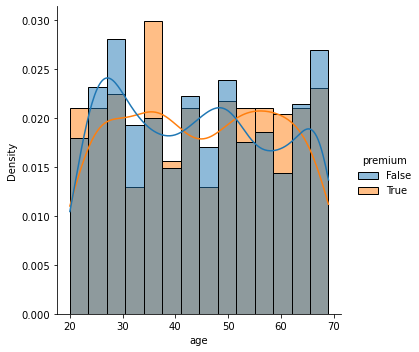

In [33]:
sns.displot(data=premium_logs, x='age', 
            hue='premium', 
            kde=True, 
            kind='hist', 
            stat='density', 
            common_norm=False, 
            bins=14)
sns.despine()

---
**Постройте график распределения числа успешных операций:**

$x$ – число успешных операций

$y$ – число клиентов, совершивших столько успешных операций

In [36]:
success_count = logs.loc[logs.success == True].client.value_counts()
success_count = success_count.rename('successes')
success_count

28719    41
52870    41
61468    41
61473    41
12179    41
         ..
70028     1
37123     1
73522     1
38359     1
40921     1
Name: successes, Length: 2845, dtype: int64

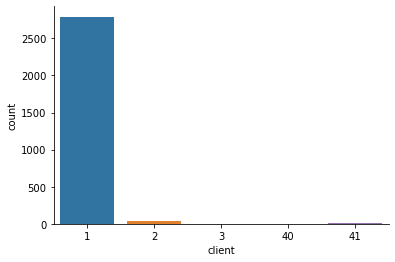

In [37]:
sns.countplot(x=success_counts)
sns.despine()

---
**Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций. Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки.**

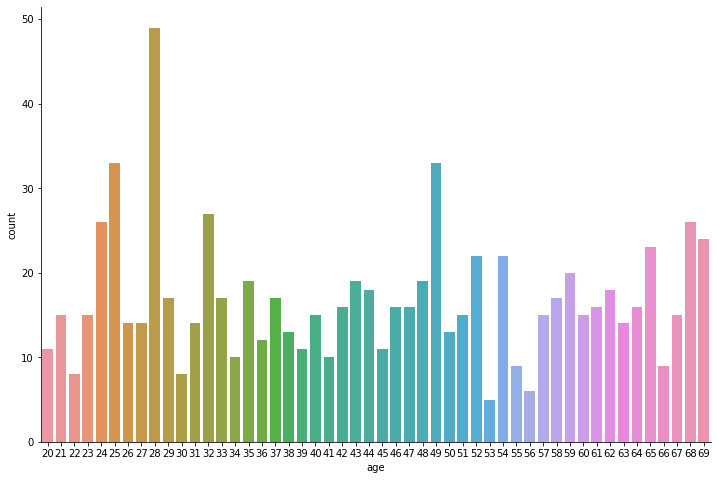

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.countplot(data=premium_logs.loc[(premium_logs.platform == 'computer')
                                   & (premium_logs.success == True)], 
             x='age')
sns.despine()

**Ответ: 28**